# Content and Objective

+ Show that short pulses act "Dirac-like"
+ Method: Get impulse response and show that convolution with short rectangle essentially results in the same output

In [1]:
# importing
import numpy as np
import scipy.signal
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 8) )

In [3]:
# define normalized RC value
RC = 1

In [4]:
# sample time and impulse response
t_sample = 0.01
t = np.arange( 0, 10, t_sample)

g = 1/RC * np.exp( -t/RC)

Text(0, 0.5, '$g(t)$')

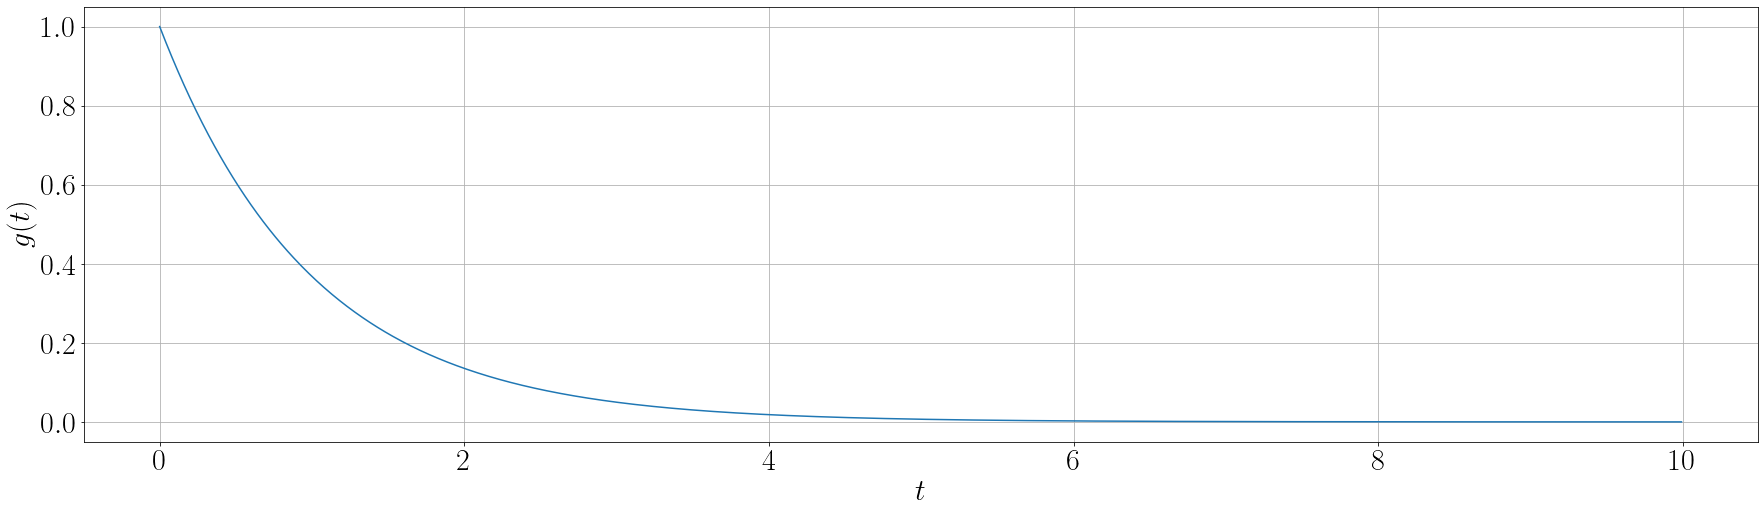

In [5]:
plt.plot( t,g )
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$g(t)$')

In [6]:
# define rectangular being significantly shorter than time constant 
x = np.zeros_like( t )
x[ : int( RC / t_sample / 4 ) ] = 1

# get output by convolution
y = np.convolve( g, x, 'same')

In [7]:
# normalize all signals to not caring about energies
x /= np.max( x )
g /= np.max( g )
y /= np.max( y )

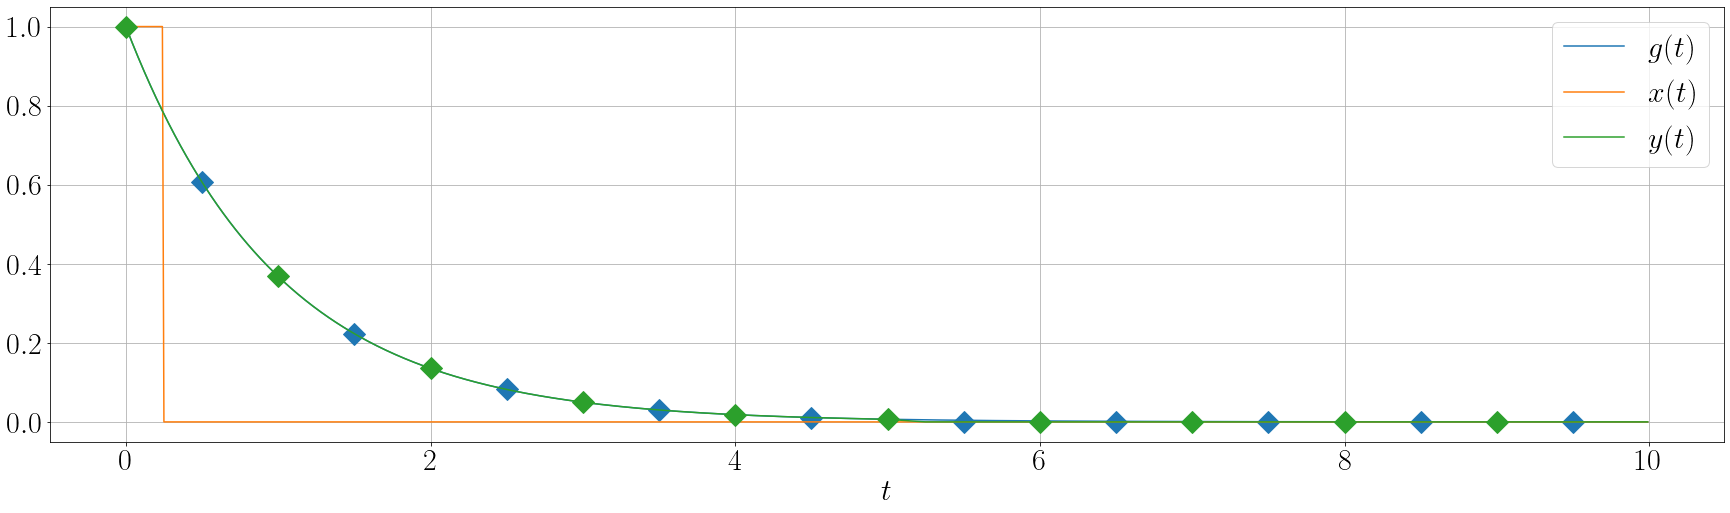

In [8]:
plt.plot( t, g ,label='$g(t)$')
plt.plot( t[ 50::100], y[ 50::100], 'D', color=plt.gca().lines[-1].get_color(), ms=16 )

plt.plot( t, x , label='$x(t)$')
ax = plt.plot( t, y , label='$y(t)$')
plt.plot( t[ ::100], y[::100], 'D', color=plt.gca().lines[-1].get_color(), ms=16 )
plt.grid( True ) 

plt.xlabel('$t$')
plt.legend( loc='best')

**Note:** Markers are only added to show that $g(t)$ and $y(t)$ are really identical.

# Now Apply Fourier Transform to Get Frequency Response

In [9]:
# get Fourier transform
G = np.fft.fft( g )
X = np.fft.fft( x )

# define frequency axis (not discussed in the lecture up-to-now)
f = np.linspace( - 1 / ( 2 * t_sample), 1 / ( 2 * t_sample ), len(G) )

Text(0, 0.5, '$|G(f)|$')

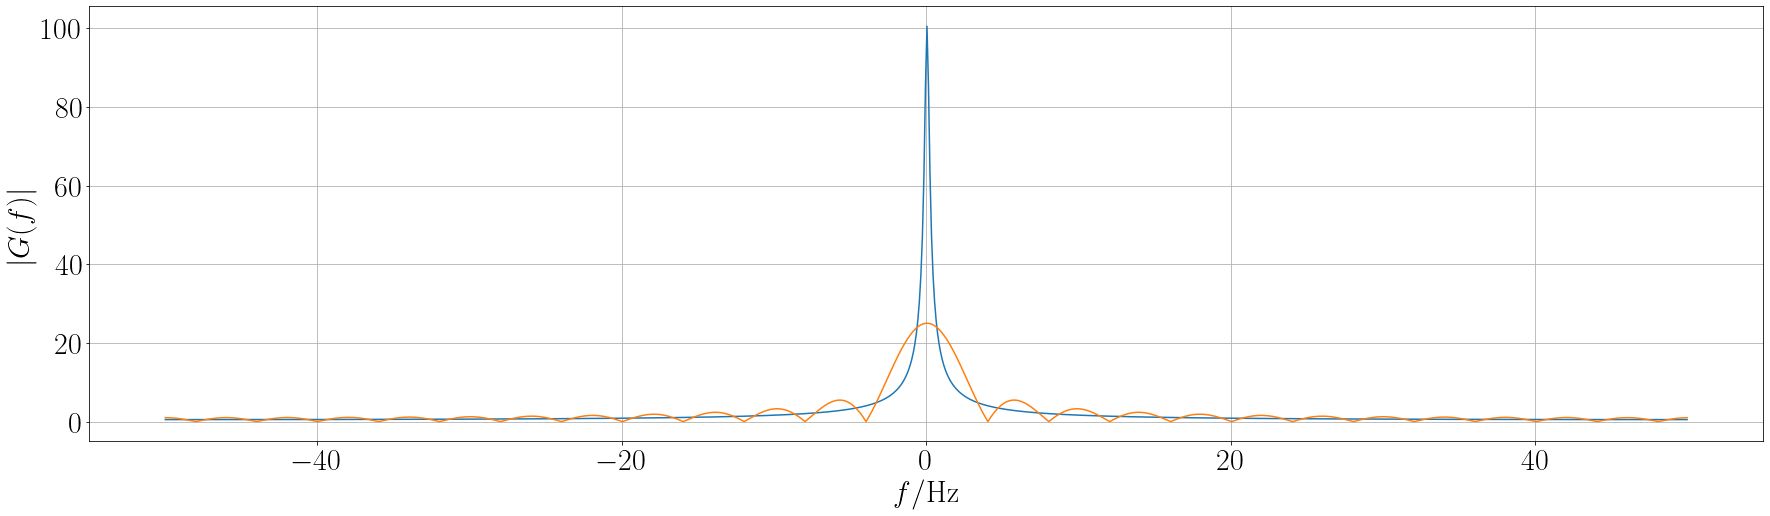

In [10]:
plt.plot( f, np.abs( np.fft.fftshift( G ) ) )
plt.plot( f, np.abs( np.fft.fftshift( X ) ) )

plt.grid( True )
plt.xlabel('$f/\\mathrm{Hz}$')
plt.ylabel('$|G(f)|$')

In [ ]:
# now "dB-it"
plt.plot( f, 10*np.log10( np.abs( np.fft.fftshift( G ) ) / np.max( np.abs( G ) ) ), label='$|G(f)|$ (dB)' )
plt.plot( f, 10*np.log10( np.abs( np.fft.fftshift( X ) ) / np.max( np.abs( X ) ) ), label='$|X(f)|$ (dB)'  )

plt.grid( True )
plt.xlabel('$f/\\mathrm{Hz}$')
plt.legend( loc='upper right')

<ipython-input-11-362cee57e51f>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot( f, 10*np.log10( np.abs( np.fft.fftshift( X ) ) / np.max( np.abs( X ) ) ), label='$|X(f)|$ (dB)'  )
